<a href="https://colab.research.google.com/github/ocalru/EDP-I-Simulacion-I/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
    <font size="10" color="lightblue">Metodo de Montecarlo</font>
</p>

Se tiene la integral definida $I$ en el intervalo $[a,b]$:

$$
I = \int_a^b g(x)\,dx
$$

Suponiendo que:

- $0 \leq g(x) \leq c$

- $a \leq x \leq b$

Como ejemplo, calculemos una integral no soluble por métodos analíticos:

$$
\int_0^1 \sqrt{\arctan(x)} \, dx
$$

Donde:

- $ g(x) = \sqrt{\arctan(x)} $
- $ a = 0 $
- $ b = 1 $




Primero, definimos y graficamos la función de prueba:

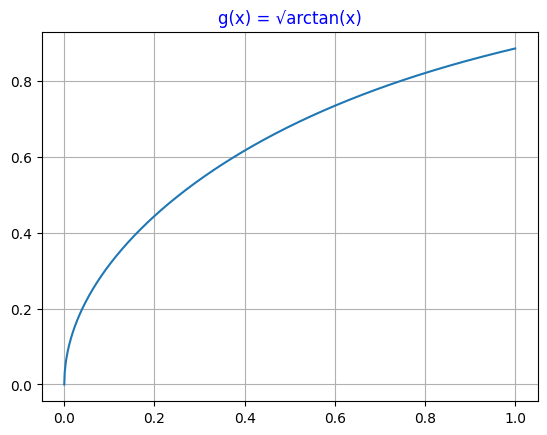

In [6]:
import numpy as np # Se importa la libreria numpy como "np"
import matplotlib.pyplot as plt # Se importa la libreria matplotlib como "plt"
import pandas as pd # Se importa la libreria panda como "pd"
import random # Se importa la libreria random

def test_function(x): # Se define la funcion test_function(x) en el parametro  de entrada "x", esta funcion es la funcion g(x).

# La funcion retorna el valor de np.sqrt(np.arctan(x)), "sqrt()" y "arctan()" son las funciones raiz cuadrada y arcotangente respectivamente,
# sacadas de la libreria numpy

    return(np.sqrt(np.arctan(x)))

# Se define el arrelgo "x" como el intervalo [0,1] que es dividos en 1000 subintervalos, usando la funcion linspace()


x_i=np.linspace(0,1,1000) # falta documentar esto
plt.grid(True)
plt.title('g(x) = √arctan(x)', color='b')
plt.plot(x_i, test_function(x_i))
plt.show()

Sea $ n \in \mathbb{N} $, con $ n \geq 2 $, el número de puntos que deseamos distribuir uniformemente en el intervalo cerrado $[a, b] \subset \mathbb{R} $, con $ a < b $.

Para distribuir estos $ n $ puntos de forma uniforme entre $ a $ y $ b $, se generan $ n - 1 $ subintervalos **iguales**.

Por lo tanto la  distancia entre puntos consecutivos es:

$$
\Delta x = \frac{b - a}{n - 1}
$$

Los puntos distribuidos en el intervalo serán entonces:

$$
x_0 = a,\quad x_1 = a + \Delta x,\quad x_2 = a + 2\Delta x,\quad \ldots,\quad x_{n-1} = a + (n - 1)\Delta x = b
$$

Es decir, el conjunto de puntos distribuidos uniformemente es:

$$
\{x_i\}_{i = 0}^{n - 1} = \left\{ a + i \cdot \Delta x \;\middle|\; i = 0, 1, 2, \dots, n - 1 \right\}
$$

Para este caso:
- $ a = 0 $
- $ b = 1 $
- $ n = 1000 $

Entonces:

$$
\Delta x = \frac{1 - 0}{1000 - 1} = \frac{1}{999} \approx 0.001001001
$$



Se tiene la formula para $x_i$:

$$
x_i = \frac{i}{999}, \quad \text{para } i = 0, 1, 2, \dots, 999
$$

Ya que $ a = 0$ y $\Delta x = \frac{1}{999}$


Calculando los terminos de la sucesion $x_i$:

$$
\begin{aligned}
x_0 &= \frac{0}{999} = 0 \\
x_1 &= \frac{1}{999} \approx 0.001001001 \\
x_2 &= \frac{2}{999} \approx 0.002002002
\end{aligned}
$$
$$
\vdots
$$





Entocnes se define que el arreglo $x_i$ como:

$$
x_i = [
0.000,\
0.001001001,\
0.002002002, \ldots ]
$$


<p align="center">
    <font size="5" color="lightblue">Metodo de Acierto y Error </font>
</p>

Sea $(x, y)$ un vector aleatorio uniformemente distribuido sobre el rectangulo con base $(b-a)$ y altura $c$ con función densidad de probabilidad :


$$U(0,1)$$

Implica:

$$P(x_1,y_1)=P(x_2,y_2)......=P(x_n,y_n)=\frac{1}{b-a}$$

Se define:

$$\Omega =  [ {(x, y)|{(x, y) \in c(b-a)}}]$$

Esto es todos los puntos $(x,y)$ que esten dentro del rectangulo con base $(b-a)$ y altura $c$.



Se define:

$$ S =  [ {(x,y)| y \leq g(x)}]$$


Esto es todos los puntos $(x,y)$ que esten debajo de la curva $g(x)$




La probabilidad $P$ de que $(x,y)$ caiga bajo la curva $g(x)$ es:

$$P = \frac{S}{ \Omega} = \frac{\int_a^b g(x)dx}{c(b-a)} = \frac{I}{c(b-a)}$$

<p align="center">
    <font size="5" color="lightblue">Aproximacion de I </font>
</p>

Si generamos $n$ vectores aleatorios independientes $(x_1, y_1)$, $(x_2, y_2)$, ..., $(x_n, y_n)$, la probabilida $P$ puede ser estimado por:

$$\hat{p} = \frac{n_A}{n}$$


Donde:

 - $n_A = $ número de puntos tal que se cumple que:

$$y \leq g(x)$$

- $n =$ numero total de puntos generados ( tamaño de muestra)


Se define el estimador $\hat{\theta_1}$ como la aproximacion del parametro  $ I$ ($ I\approx \hat{\theta_1}$):


$$\hat{\theta_1} = [c(b-a)]\hat{p} = c(b-a)\frac{n_A}{n} $$

Tambien:

$$μ_\hat{\theta_1}= \mathbb{E}[(\hat{\theta_1})]= I$$


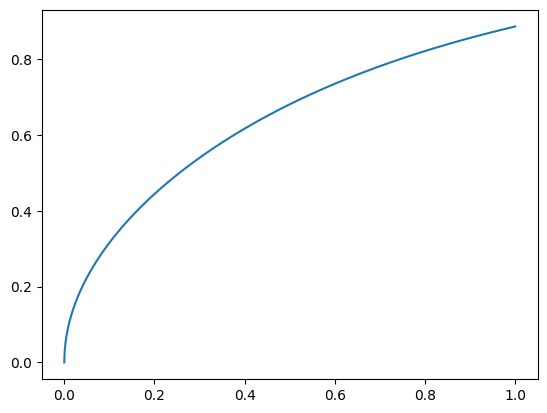

In [8]:
def integrate(x1,x2,func=test_function,n=100000):
    X=np.linspace(x1,x2,1000) # x ∈ [x1,x2]
    y1=0 # y ∈ [y1 = 0,y2 = max(func(X))]
    y2=max((func(X)))
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1) # n=1, generara una muestra por cada iteracion
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0: # |y| >= |g(x)|, el valor para la cordenada y esta por encima de la grafica de g(x) o  y ∉ [y1 = 0,y2 = max(func(X))]
            check.append(0) #el punto no se cuenta, se suma un "0" al arreglo "check"
        else:
            check.append(1) # |y| <= |g(x)|, el valor esta por debajo de la curva g(x), se cuenta el punto y se suma un "1" al arreglo "check"
    return(np.mean(check)*area,xs,ys,check)




X=np.linspace(0,1,1000)
plt.plot(X,test_function(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()